# covid 19 India Data analysis

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [358]:
df1=pd.read_csv("CovidDataCleaned2.csv",low_memory=False)

In [359]:
df1

,Num Cases,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1.0,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,1.0,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,2,3,2020
3,1.0,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,3,2,2020
4,1.0,24,M,Hyderabad,Hyderabad,Telangana,Recovered,3,2,2020
...,...,...,...,...,...,...,...,...,...,...
847426,0.0,NaN,NaN,NaN,Subarnapur,Odisha,Recovered,31,10,2021
847427,8.0,NaN,NaN,NaN,Sundargarh,Odisha,Recovered,31,10,2021
847428,-10.0,NaN,NaN,NaN,Tawang,Arunachal Pradesh,Recovered,31,10,2021
847429,5.0,NaN,NaN,NaN,West Kameng,Arunachal Pradesh,Recovered,31,10,2021


# inspecting null value columns

In [360]:
df1.isnull().sum(axis=0).sort_values()

Day                       0
Month                     0
Year                      0
Current Status           11
Detected State           18
Num Cases                20
Detected District     16928
Gender               703055
Age Bracket          705320
Detected City        832652
dtype: int64

# inspecting null in rows

In [361]:
df1.isnull().sum(axis=1).sort_values()

0         0
80298     0
80297     0
80296     0
80295     0
         ..
779231    7
779232    7
377408    7
377409    7
377410    7
Length: 847431, dtype: int64

# total no all cases died,recovered,hospitalized

In [362]:
df1.groupby('Month')['Num Cases'].sum()

Month
1      2822633.0
2      2594863.0
3      3612529.0
4     11229642.0
5     13188851.0
6      5183738.0
7      5133821.0
8      6141387.0
9      6462140.0
10     5122069.0
11     3724389.0
12     3195197.0
Name: Num Cases, dtype: float64

# number of people Died month wise data

In [363]:
df1[df1['Current Status']=='Deceased'].groupby('Month')['Num Cases'].sum()

Month
1     17354.0
2     15391.0
3     18336.0
4     55951.0
5     90476.0
6     51872.0
7     41153.0
8     41207.0
9     43553.0
10    34854.0
11    25004.0
12    22483.0
Name: Num Cases, dtype: float64

# total recovered cases month wise

In [364]:
df1[df1['Current Status']=='Recovered'].groupby('Month')['Num Cases'].sum()

Month
1     1407666.0
2     1256760.0
3     1598156.0
4     4540362.0
5     7372453.0
6     2718852.0
7     2387226.0
8     2957158.0
9     3253046.0
10    2686849.0
11    1844104.0
12    1632402.0
Name: Num Cases, dtype: float64

# total no of hospitalized cases month wise

In [365]:
df1[df1['Current Status']=='Hospitalized'].groupby('Month')['Num Cases'].sum()

Month
1     1395693.0
2     1322192.0
3     1995355.0
4     6630252.0
5     5724199.0
6     2411688.0
7     2704788.0
8     3142544.0
9     3164753.0
10    2399511.0
11    1854803.0
12    1539605.0
Name: Num Cases, dtype: float64

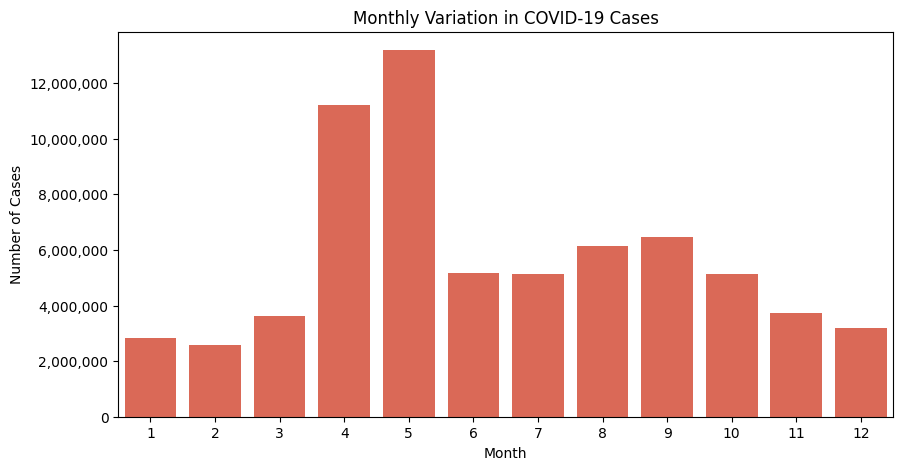

In [366]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming df is your DataFrame and 'Month' is a column in df
monthly_cases =df1.groupby('Month')['Num Cases'].sum().reset_index()

plt.figure(figsize=(10,5))
ax = sns.barplot(x='Month', y='Num Cases', data=monthly_cases, color='#F05941')
plt.title('Monthly Variation in COVID-19 Cases')
plt.xlabel('Month')
plt.ylabel('Number of Cases')

# Format y-axis labels without scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.savefig("monthlycases.svg")
plt.show()



# total cases gender wise

In [367]:
df1.groupby('Gender')['Num Cases'].sum()

Gender
 M                1.0
F             52804.0
F                 6.0
M             94848.0
M                 7.0
Non-Binary       19.0
Name: Num Cases, dtype: float64

# total total no of cases states wise

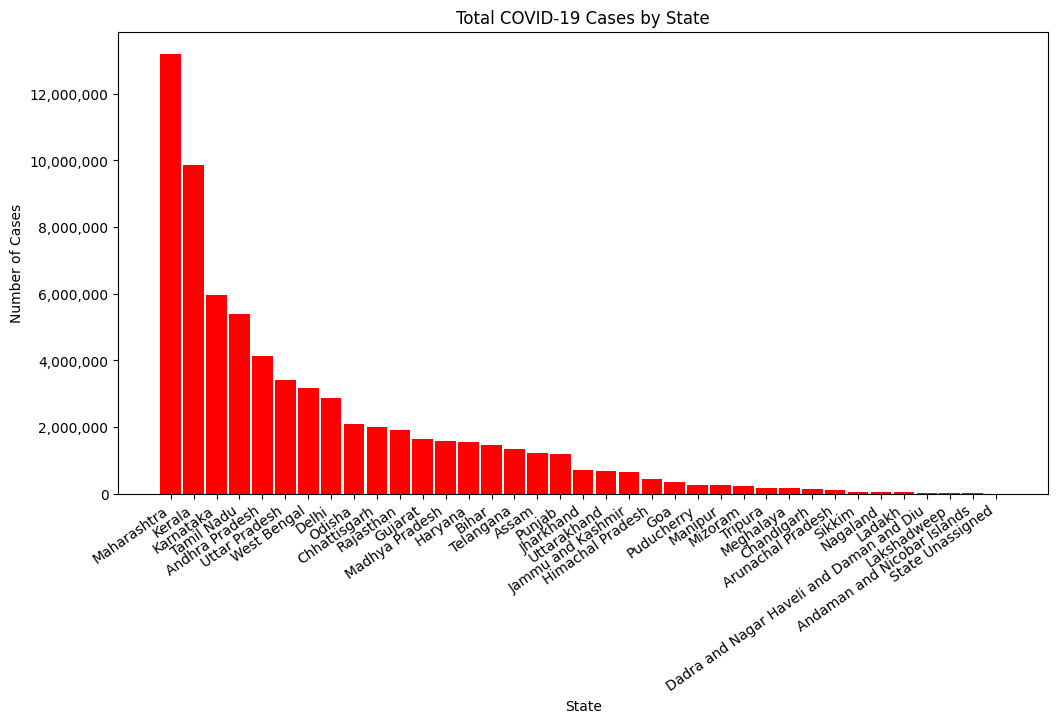

In [368]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Assuming df is your DataFrame and 'Detected State' is a column in df
statewise_cases = df1.groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,6))
plt.bar(statewise_cases['Detected State'], statewise_cases['Num Cases'], color='red',width=0.9)
plt.title('Total COVID-19 Cases by State')
plt.xlabel('State')
plt.ylabel('Number of Cases')

# Format y-axis labels without scientific notation
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.xticks(rotation=35, ha='right')  # Rotate x-axis labels for better visibility
plt.savefig("totalnoofcasesstatewise.svg")
plt.show()


# Which Age group is in

In [369]:
df1.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False)

Age Bracket
30          3773.0
40          3539.0
58          3521.0
45          3435.0
35          3415.0
             ...  
29.6           1.0
4.5            1.0
5 Months       1.0
5 months       1.0
4 Months       1.0
Name: Num Cases, Length: 151, dtype: float64

In [370]:
M=df1.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False)[0:10]

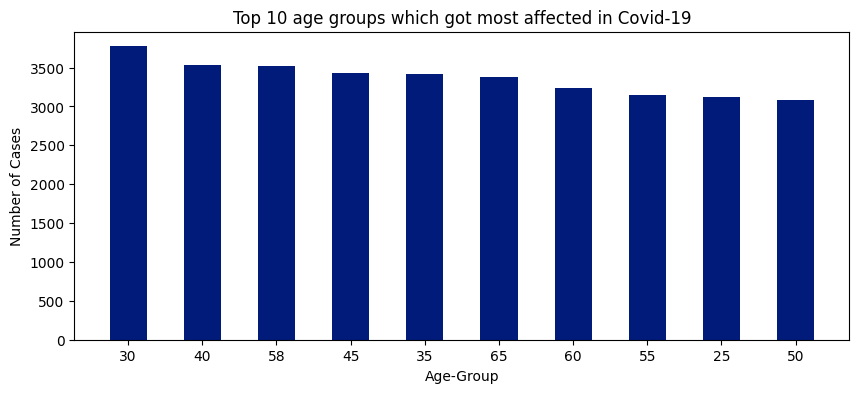

In [371]:
#bargraph to show top 10 age groups got most infected.
plt.figure(figsize=(10,4))
x=M.index
y=M.values
plt.bar(x=x,height=y,width=0.5,color="#001B79")
plt.title("Top 10 age groups which got most affected in Covid-19")
plt.xlabel("Age-Group")
plt.ylabel("Number of Cases")
plt.savefig('agegroup10mostaffected.svg')
plt.show()

# state wise total no of cases which are still hospitalized

In [372]:
Data=df1[df1['Current Status']=="Hospitalized"].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)[0:10]

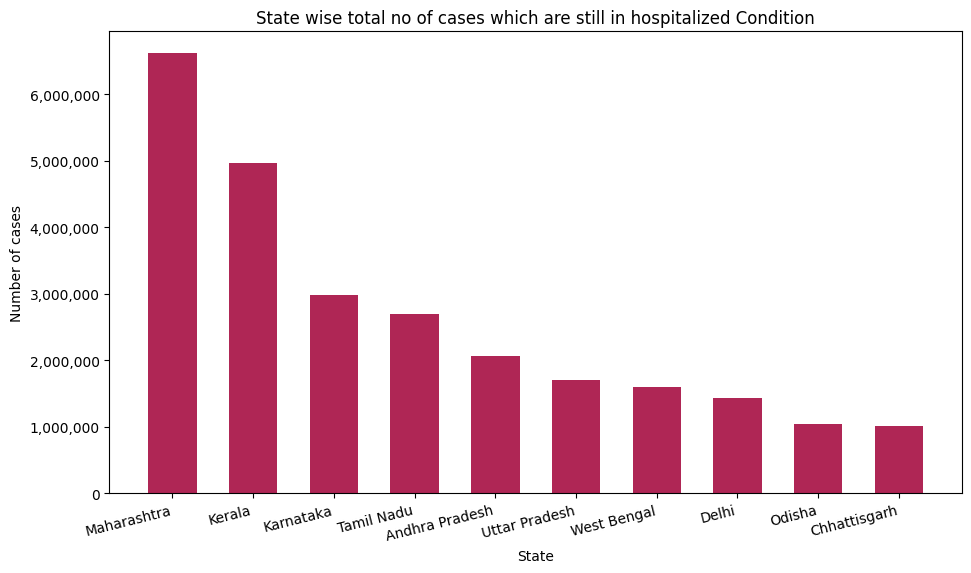

In [373]:
# top 10 states with most no of cases(i.e hospitalized)
# bar graph for total no of cases i.e hospitalized in each state.
x=Data.index
y=Data.values
plt.figure(figsize=(11,6))
plt.bar(x=x,height=y,width=0.6,color="#AF2655")
plt.title("State wise total no of cases which are still in hospitalized Condition")
plt.xlabel('State')
plt.ylabel('Number of cases')
plt.xticks(rotation=14, ha='right') 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
# plt.savefig("hospitalizedstate10.svg")
plt.show()

# total no of cases every day

In [374]:
# Total number of cases everyday.
day=df1[df1['Current Status']=="Hospitalized"].groupby(['Month','Day']) [['Num Cases']].sum()

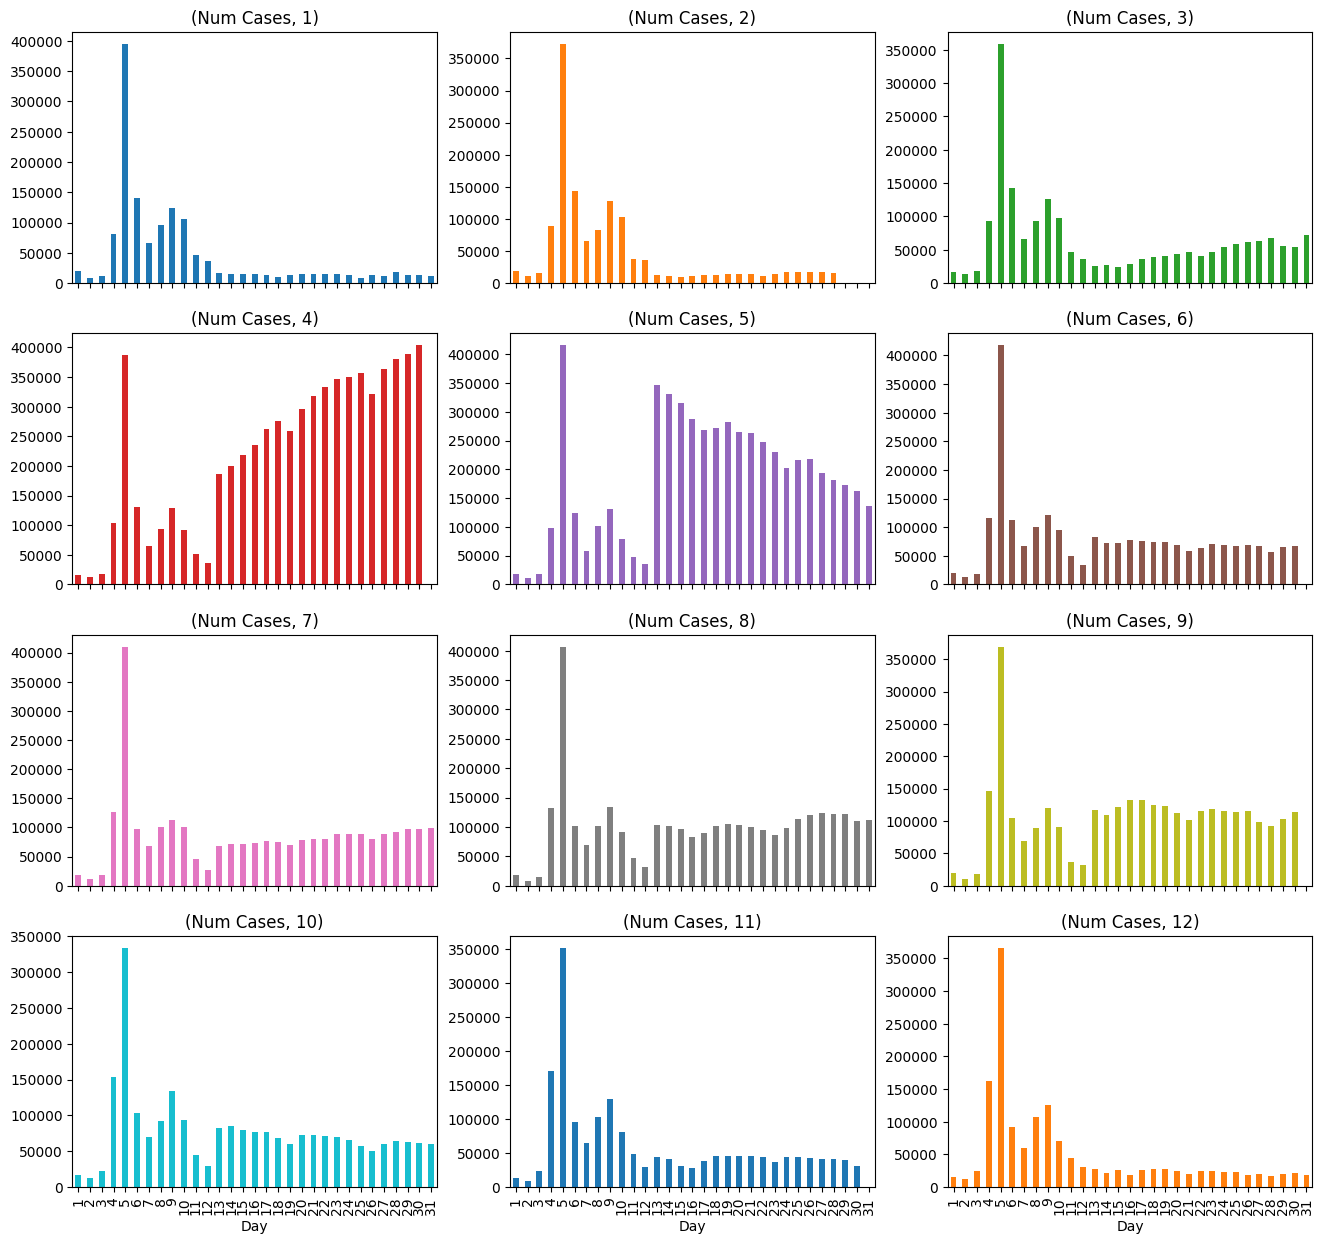

In [375]:
day.unstack(level=0).plot(kind="bar",subplots=True,figsize=(16,15),layout=(4,3),legend=False)
plt.savefig('caseseveryday.svg')
plt.show()

# total no of deaths state wise

In [376]:
df1[df1['Current Status']=='Deceased'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)

Detected State
Maharashtra                                 139885.0
Karnataka                                    38074.0
Tamil Nadu                                   36093.0
Kerala                                       31680.0
Delhi                                        25038.0
Uttar Pradesh                                22871.0
West Bengal                                  19124.0
Punjab                                       16543.0
Andhra Pradesh                               14342.0
Chhattisgarh                                 13577.0
Madhya Pradesh                               10423.0
Haryana                                      10046.0
Gujarat                                       9942.0
Bihar                                         9660.0
Rajasthan                                     8914.0
Odisha                                        8386.0
Uttarakhand                                   7400.0
Assam                                         5996.0
Jharkhand                      

In [377]:
data=df1[df1['Current Status']=='Deceased'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)[0:3]

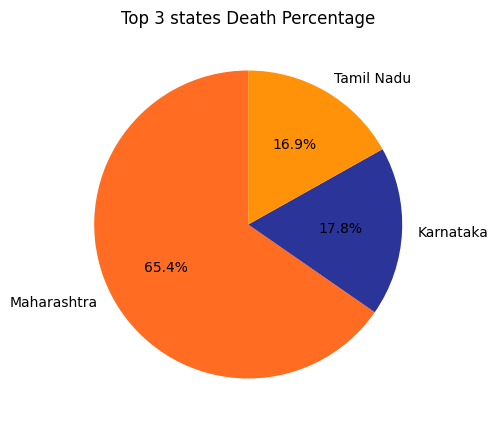

In [378]:
# pie chart showing top 3 states where deaths % are more.
plt.figure(figsize=(6,5))
colorp=['#FF6C22','#2B3499','#FF9209']
plt.pie(x=data.values,labels=data.index,autopct='%1.1f%%',startangle=90,colors=colorp)
plt.title("Top 3 states Death Percentage")
plt.savefig("Death1.svg")
plt.show()

# Total no patients Recovered by states.

In [379]:
data=df1[df1['Current Status']=="Recovered"].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)

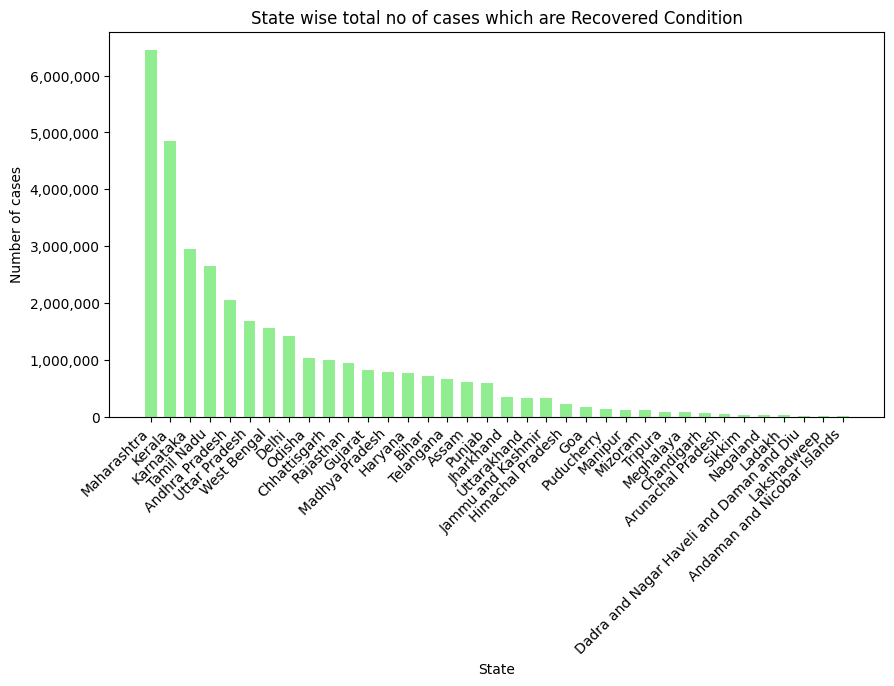

In [380]:
x=data.index
y=data.values
plt.figure(figsize=(10,5))
plt.bar(x=x,height=y,width=0.6,color="lightgreen")
plt.title("State wise total no of cases which are Recovered Condition")
plt.xlabel('State')
plt.ylabel('Number of cases')
plt.xticks(rotation=45, ha='right') 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.savefig("recover.svg")
plt.show()

# Total no of cases year wise

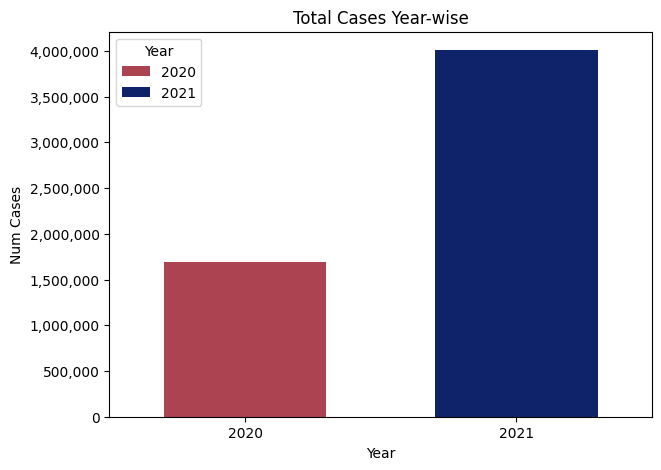

In [381]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'Year' and 'Month' are columns in your DataFrame
cases = df1.groupby(['Year', 'Month'])['Num Cases'].sum().reset_index()
plt.figure(figsize=(7,5))
plt.title("Total Cases Year-wise")
plt.xlabel('Year')
plt.ylabel('Num Cases')
colorp=['#BE3144','#001B79']
sns.barplot(x='Year', y='Num Cases', data=cases,errorbar=None,hue='Year',palette=colorp,width=0.6)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.savefig("totalcasesyearwise.svg")
plt.show()
